<a href="https://colab.research.google.com/github/ErikVasconcelos/biblioteca_pandas/blob/main/Case_2_M%C3%A9tricas_Loja_de_Varejo_(Aula_284)_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

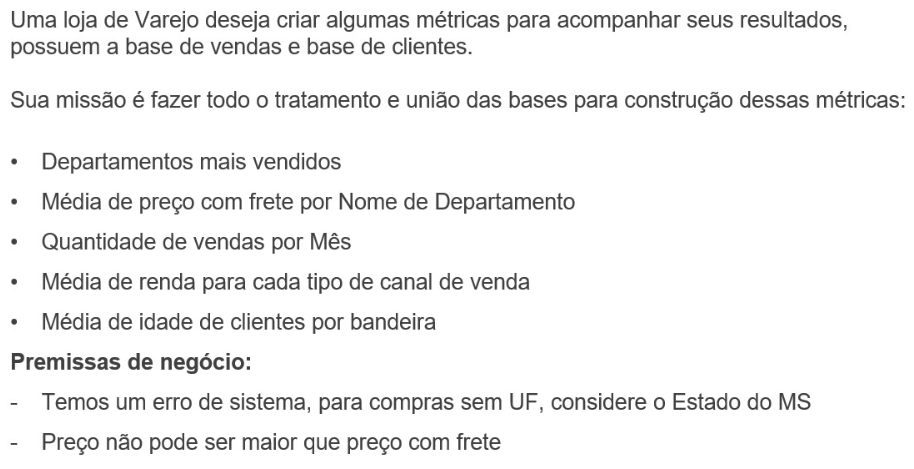

Importando bibliotecas

In [10]:
import pandas as pd
import seaborn as sns

Carregando dataset

In [11]:
vendas = pd.read_excel("/content/sample_data/varejo.xlsx")
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


Agrupando por "idcanalvenda" - Quantidade de linhas

In [12]:
vendas.groupby("idcanalvenda").idcompra.nunique()

idcanalvenda
APP             139
Aplicativo    21425
Internet      24515
Mobile        24732
Name: idcompra, dtype: int64

Unificando classes semelhantes (APP > Aplicativo)

In [13]:
vendas["idcanalvenda"] = vendas["idcanalvenda"].str.replace("APP", "Aplicativo")
vendas.groupby("idcanalvenda").idcompra.nunique()

idcanalvenda
Aplicativo    21539
Internet      24515
Mobile        24732
Name: idcompra, dtype: int64

Editando espaços em branco para underlines

In [14]:
vendas["Nome_Departamento"] = vendas["Nome_Departamento"].str.replace(" ", "_")
vendas.groupby("Nome_Departamento").idcompra.nunique()

Nome_Departamento
Acessorios_e_Inovacoes     3548
Alimentos                     2
Ar_e_Ventilacao             951
Audio                      1794
Automotivo                  895
Bebes                      4531
Beleza_e_Saude             4626
Brinquedos                 1320
Cama,_Mesa_e_Banho          153
Casa_e_Construcao           263
Cine_e_Foto                  11
Decoracao                   134
Eletrodomesticos          10501
Eletroportateis            9593
Esporte_e_Lazer             531
Ferramentas                1111
Games                       764
Informatica                5290
Instrumentos_Musicais         1
Linha_Industrial             86
Malas_e_Mochilas            114
Moda                          3
Moveis                     4175
Perfumaria                  624
Pet_Shop                     43
Produtos_de_Limpeza         713
Relogios                    134
TV_e_Video                    5
TVs_e_Acessorios           5326
Tablets                    1770
Telefones_e_Celulares 

Tratamento de Nulos (Aula 286)

In [15]:
# Perceba que as colunas de preço e estado possuem dados nulos.
vendas[vendas["estado"].isnull()]

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
96,382380,Internet,A,2023-04-26,NaN,879.200,Telefones_e_Celulares,NaN,5804
284,346055,Internet,A,2023-03-23,NaN,87.648,Ar_e_Ventilacao,NaN,16359
402,172555,Mobile,A,2023-03-19,NaN,135.840,Ar_e_Ventilacao,NaN,13691
411,446380,Mobile,A,2023-03-09,NaN,1703.120,Eletrodomesticos,NaN,13024
770,40425,Mobile,B,2023-04-21,NaN,1759.200,Telefones_e_Celulares,NaN,9121
...,...,...,...,...,...,...,...,...,...
78610,399680,Aplicativo,A,2023-04-19,NaN,339.912,Eletroportateis,NaN,20873
78718,320895,Mobile,B,2023-01-20,NaN,1000.800,Telefones_e_Celulares,NaN,17772
79465,389240,Aplicativo,A,2023-01-14,NaN,279.200,Eletrodomesticos,NaN,20399
79548,124585,Mobile,A,2023-04-21,NaN,2051.240,TVs_e_Acessorios,NaN,17784


Eliminando todos os dados nulos

In [16]:
vendas_sem_nulos = vendas.dropna()
vendas_sem_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79926 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           79926 non-null  int64         
 1   idcanalvenda       79926 non-null  object        
 2   bandeira           79926 non-null  object        
 3   Data               79926 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    79926 non-null  float64       
 6   Nome_Departamento  79926 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        79926 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 6.1+ MB


Adicionando um dos requisitos do case - estados nulos > MS

In [17]:
vendas["estado"].fillna("MS", inplace=True)
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


Adicionando valores aos linhas de preço nulo

In [18]:
media_preco = vendas["Preço"].mean()

vendas["Preço"].fillna(media_preco, inplace=True) # ou (vendas"Preço"].mean(), inplace=True)
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              80228 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


Uma das premissas do caso é: O preço não pode ser maior que o preço com frete.

In [19]:
# Visualização inicial:

vendas[["Preço","Preço_com_frete"]].describe()

,Preço,Preço_com_frete
count,80228.000000,80228.000000
mean,906.589129,908.619823
std,1057.611490,1057.583101
min,6.320000,6.320000
25%,147.920000,150.706000
50%,532.448000,535.120000
75%,1199.200000,1215.240000
max,14439.240000,14439.240000


In [20]:
vendas_erradas = vendas.query("Preço > Preço_com_frete")

vendas_corretas = vendas.query("Preço < Preço_com_frete")

vendas_corretas.describe()

,idcompra,Data,Preço,Preço_com_frete,cliente_Log
count,22047.000000,22047,22047.000000,22047.000000,22047.000000
mean,253799.955550,2023-03-02 05:19:31.261395968,549.518401,567.332688,13856.313013
min,25.000000,2023-01-02 00:00:00,8.720000,9.512000,1.000000
25%,127670.000000,2023-02-01 00:00:00,93.528000,100.800000,6858.000000
50%,257885.000000,2023-03-02 00:00:00,183.200000,193.912000,13845.000000
75%,379705.000000,2023-04-01 00:00:00,661.680000,676.736000,20801.000000
max,499960.000000,2023-04-30 00:00:00,14391.200000,14407.120000,27982.000000
std,144794.628563,NaN,846.295127,863.458763,8049.120135


In [21]:
# Analisando na categoria de departamento a classe de esportes e lazer no estado de SP
vendas_corretas.query("Nome_Departamento == 'Esporte_e_Lazer' and estado == 'SP'").describe()

,idcompra,Data,Preço,Preço_com_frete,cliente_Log
count,168.000000,168,168.000000,168.00000,168.000000
mean,265130.744048,2023-03-05 23:51:25.714285824,1070.083095,1098.71319,14368.571429
min,2145.000000,2023-01-02 00:00:00,10.896000,16.11200,210.000000
25%,157955.000000,2023-02-03 18:00:00,527.200000,545.32000,7717.500000
50%,253702.500000,2023-03-07 00:00:00,1108.008000,1136.24800,15281.000000
75%,380616.250000,2023-04-09 00:00:00,1599.200000,1618.88400,20538.000000
max,496910.000000,2023-04-30 00:00:00,2399.200000,2432.74400,27837.000000
std,140435.252208,NaN,617.138494,620.66244,7890.233136


In [22]:
# Departamentos mais vendidos:

vendas_corretas.groupby("Nome_Departamento").idcompra.nunique().sort_values(ascending=False).reset_index()


,Nome_Departamento,idcompra
0,Bebes,4353
1,Eletrodomesticos,4201
2,Eletroportateis,2223
3,Moveis,2036
4,Utilidades_Domesticas,1366
5,Acessorios_e_Inovacoes,1243
6,Beleza_e_Saude,1054
7,Brinquedos,686
8,Perfumaria,563
9,Produtos_de_Limpeza,522


In [23]:
# Média de preço com frete por nome de departamento:

round(vendas_corretas.groupby("Nome_Departamento")["Preço_com_frete"].agg("mean").sort_values(ascending=False).reset_index(), 2)

# Função (round, num) para casas decimais

,Nome_Departamento,Preço_com_frete
0,TVs_e_Acessorios,3469.38
1,Informatica,2159.78
2,Linha_Industrial,2027.11
3,Cine_e_Foto,1851.20
4,Telefones_e_Celulares,1442.19
5,Eletrodomesticos,1400.66
6,Esporte_e_Lazer,1123.14
7,Tablets,1100.23
8,Games,942.90
9,Instrumentos_Musicais,834.61


In [24]:
# Quantidade de vendas por data:

vendas_corretas.groupby("Data").idcompra.nunique().sort_values(ascending=False).reset_index()

,Data,idcompra
0,2023-02-13,226
1,2023-01-20,218
2,2023-03-07,215
3,2023-03-30,214
4,2023-02-20,214
...,...,...
114,2023-02-15,162
115,2023-04-04,162
116,2023-02-25,161
117,2023-02-22,156


In [25]:
# Para agrupamento e criação da coluna "mês"

vendas_corretas["mês"] = vendas_corretas["Data"].dt.month
vendas_corretas.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,mês
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662,3
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060,2


In [26]:
# Quantiadade de vendas por mês:

vendas_corretas.groupby("mês").idcompra.nunique().sort_values(ascending=False).reset_index()

,mês,idcompra
0,3,5590
1,4,5454
2,1,5309
3,2,5138


# Fazendo o join com a tabela clientes (Aula 288)

In [27]:
clientes = pd.read_excel("/content/sample_data/cliente_varejo.xlsx")
clientes.head()

,cliente_Log,idade,renda
0,15042,89,11337
1,17590,54,2050
2,15478,47,8258
3,2933,39,4671
4,19790,26,9207


In [28]:
# Trocando o tipo de dado
clientes = clientes.astype({"renda":"float"})
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cliente_Log  26425 non-null  int64  
 1   idade        26425 non-null  int64  
 2   renda        26425 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 619.5 KB


In [29]:
# Realizando o join em Python
vendas_cliente = vendas_corretas.merge(clientes, how="left", on="cliente_Log")
vendas_cliente.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,mês,idade,renda
0,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3,47,8258.0
1,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,26,9207.0
2,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,58,9204.0
3,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,48,2796.0
4,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2,78,6596.0


In [30]:
# Média de renda por canal

agg_canal_renda = vendas_cliente.groupby("idcanalvenda")["renda"].agg("mean").sort_values(ascending=False).reset_index()
agg_canal_renda

,idcanalvenda,renda
0,Aplicativo,8244.851376
1,Mobile,8222.717801
2,Internet,8211.844949


In [31]:
# Média de idade de clientes por bandeira

agg_idade_bandeira = vendas_cliente.groupby("bandeira")["idade"].agg("mean").sort_values(ascending=False).reset_index()
agg_idade_bandeira

,bandeira,idade
0,A,53.303003
1,B,53.287576


# Importando uma das bibliotecas de Data Visualization - Matplotlib

In [32]:
import matplotlib.pyplot as plt

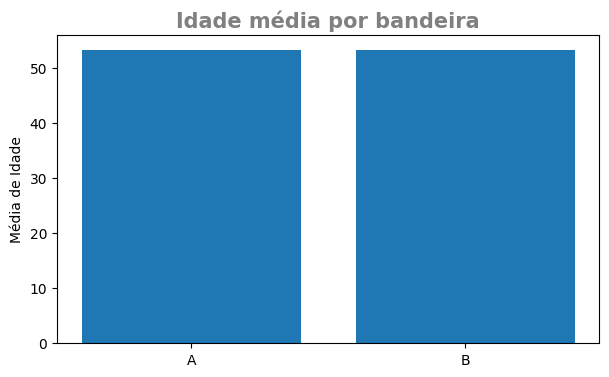

In [33]:
# Gráfico de bandeira por idade

agg_idade_bandeira = vendas_cliente.groupby("bandeira")["idade"].agg("mean").sort_values(ascending=False).reset_index()

fig = plt.figure(figsize=(7,4))

plt.bar(agg_idade_bandeira["bandeira"], agg_idade_bandeira["idade"])

plt.ylabel("Média de Idade")

plt.title("Idade média por bandeira", loc="center", fontsize=15, fontweight="bold", color="gray");

Text(0.5, 1.0, 'Renda Média Por Canal de Venda')

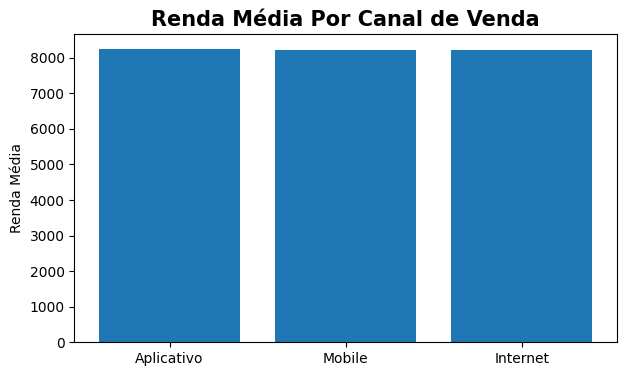

In [34]:
# Gráfico de renda média por canal de venda

fig = plt.figure(figsize=(7,4))

agg_canal_renda = vendas_cliente.groupby("idcanalvenda")["renda"].agg("mean").sort_values(ascending=False).reset_index()

plt.bar(agg_canal_renda["idcanalvenda"], agg_canal_renda["renda"])

plt.ylabel("Renda Média")

plt.title("Renda Média Por Canal de Venda", loc="center", fontsize = 15, fontweight="bold", color="black")

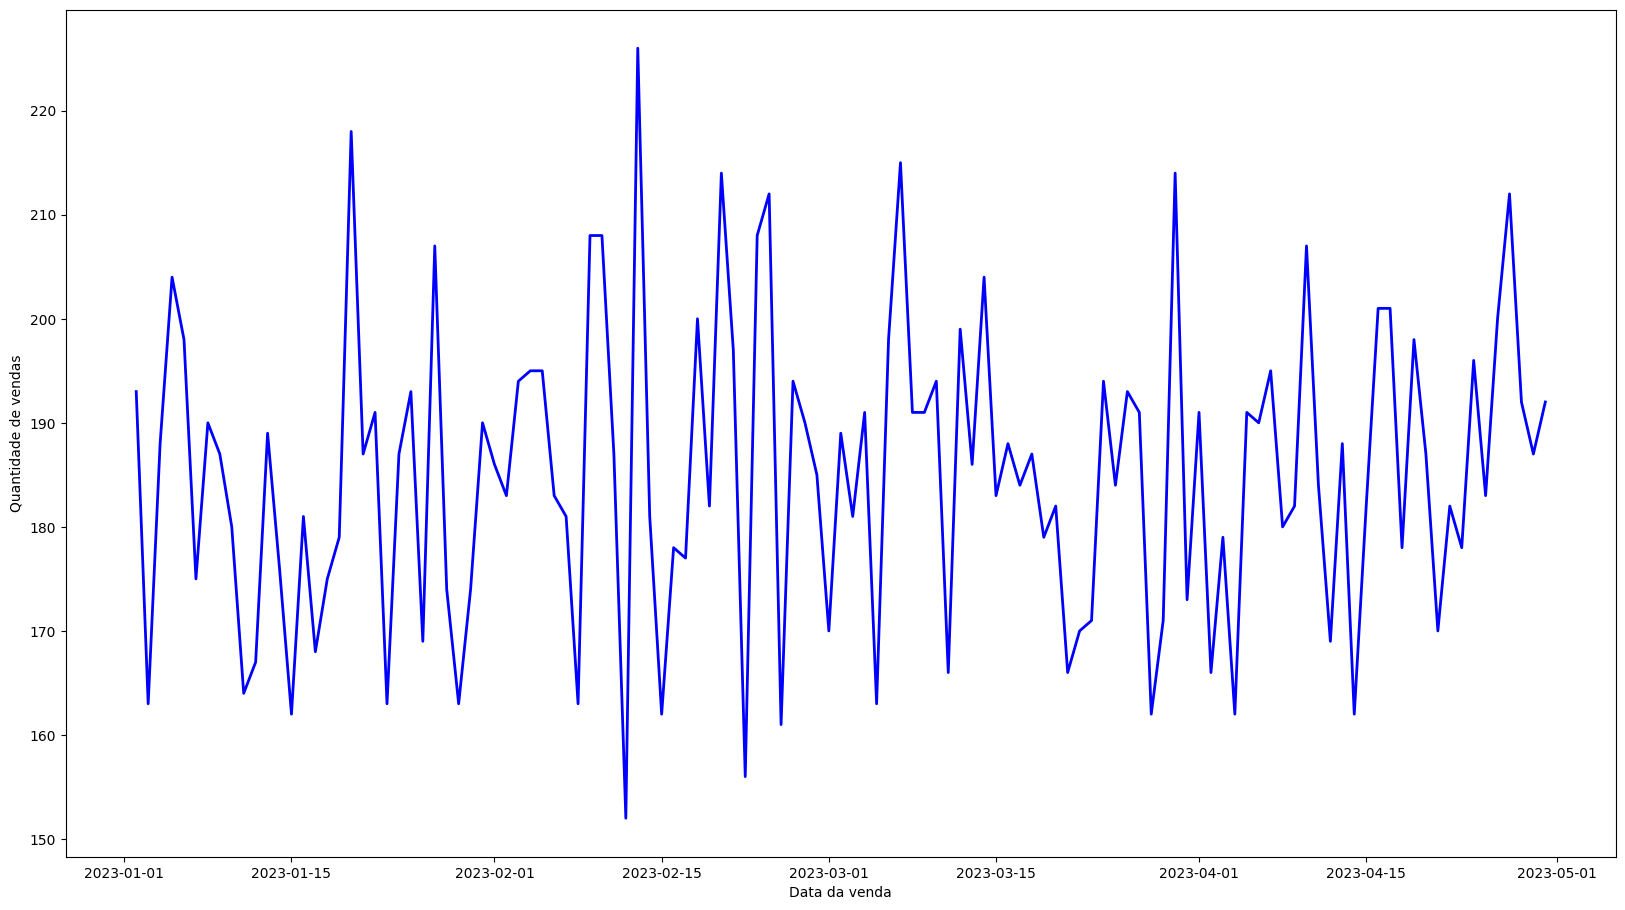

In [35]:
# Gráfico de vendas por período

agg_venda_data = vendas_corretas.groupby("Data").idcompra.nunique().sort_values(ascending=False).reset_index()

agg_venda_data = agg_venda_data.sort_values("Data")

fig = plt.figure(figsize=(20,11))

plt.xlabel("Data da venda")
plt.ylabel("Quantidade de vendas")
x = agg_venda_data["Data"]
y = agg_venda_data["idcompra"]

plt.plot(x, y, color="blue", linewidth=2)

plt.show()




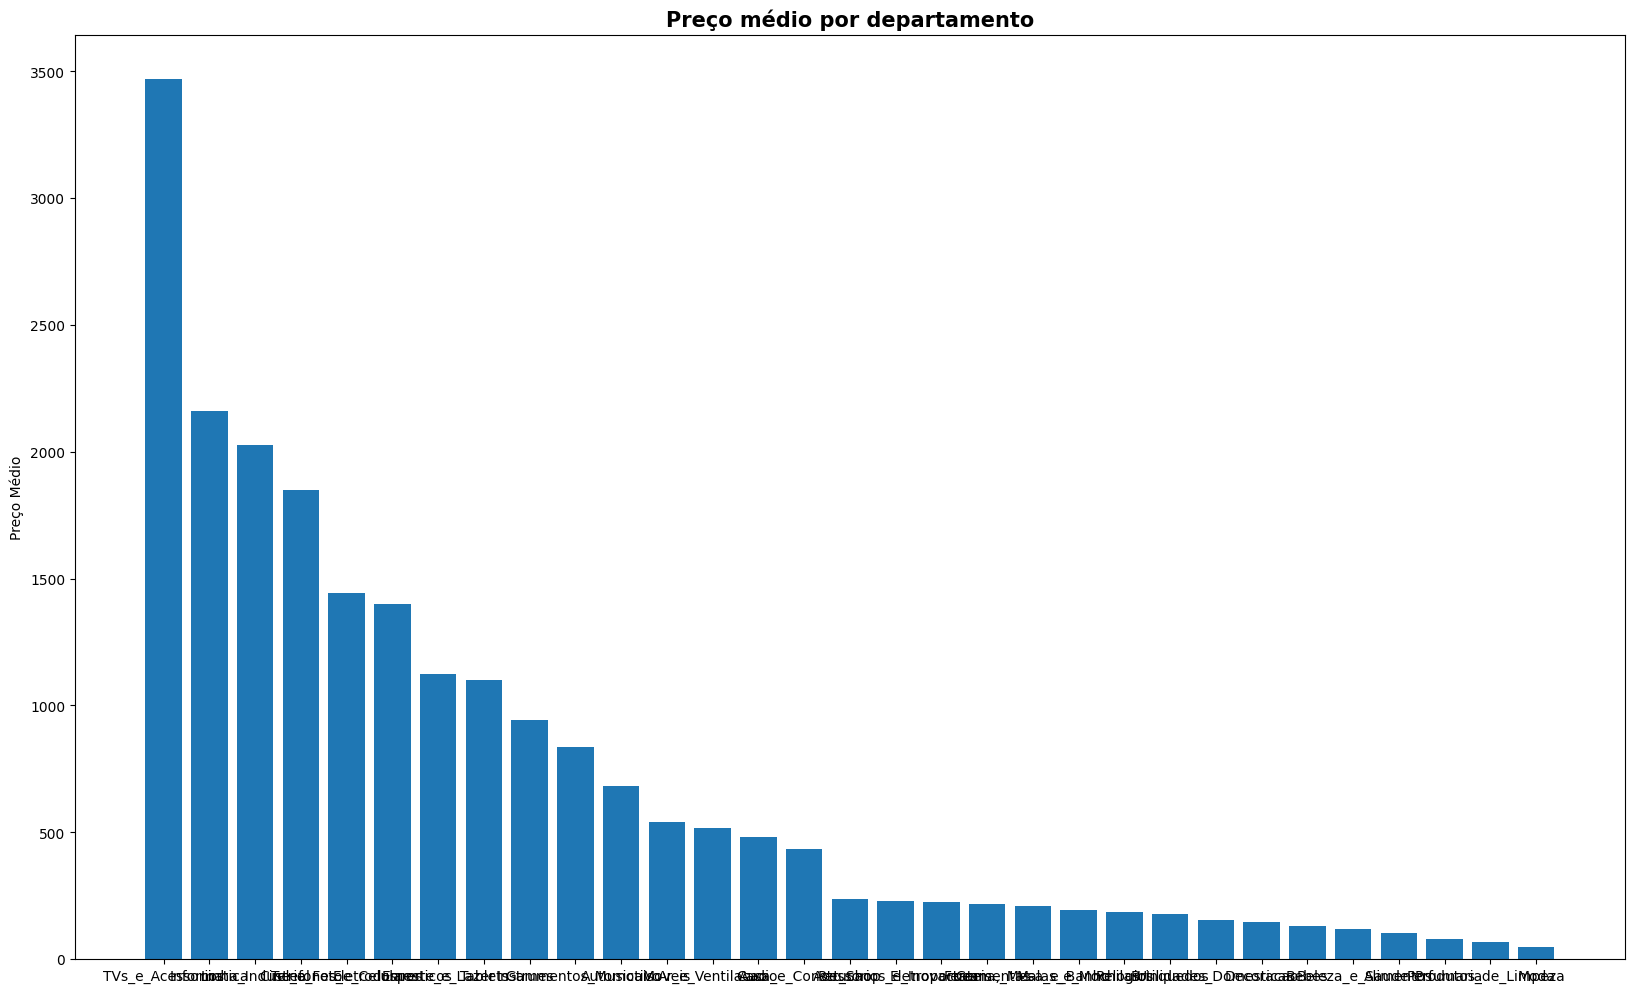

In [36]:
# Gráfico de preço médio por departamento:

agg_dept_preco = vendas_corretas.groupby("Nome_Departamento")["Preço_com_frete"].agg("mean").sort_values(ascending=False).reset_index()
agg_dept_preco = agg_dept_preco.round(2)

fig = plt.figure(figsize=(20,12))

plt.bar(agg_dept_preco["Nome_Departamento"], agg_dept_preco["Preço_com_frete"])
plt.ylabel("Preço Médio")
plt.title("Preço médio por departamento", loc="center", fontsize=15, fontweight="bold")
plt.show()


# Importando uma das bibliotecas de Data Visualization - Plotly

# Importando uma das bibliotecas de Data Visualization - Plotly

In [37]:
# Algumas bibliotecas não são nativas e precisam ser instaladas, para isso, usamos o %pip install
%pip install plotly
%pip install cufflinks
%pip install chart-studio


In [38]:
# Importando as bibliotecas:

import chart_studio.plotly as py
import cufflinks as cf

import plotly.graph_objects as go
import plotly.express as px

In [40]:
# Gráfico de idade por bandeira - Plotly

px.bar(agg_idade_bandeira, x = "bandeira", y = "idade")

In [42]:
# Gráfico de vendas por período - Plotly

px.line(agg_venda_data, x = "Data", y = "idcompra")

In [43]:
# Gráfico de preço por departamento:

px.bar(agg_dept_preco, x = "Nome_Departamento", y = "Preço_com_frete")